### Importing Library and Datasets

In [1]:
#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [2]:
googledata = pd.read_csv("googleplaystore.csv")    #use your own path for the data set
googledata.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [3]:
googledata = googledata[["App","Rating","Reviews", "Installs","Price","Content Rating","Category"]]
googledata.head(10)

,App,Rating,Reviews,Installs,Price,Content Rating,Category
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,"10,000+",0,Everyone,ART_AND_DESIGN
1,Coloring book moana,3.9,967,"500,000+",0,Everyone,ART_AND_DESIGN
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,87510,"5,000,000+",0,Everyone,ART_AND_DESIGN
3,Sketch - Draw & Paint,4.5,215644,"50,000,000+",0,Teen,ART_AND_DESIGN
4,Pixel Draw - Number Art Coloring Book,4.3,967,"100,000+",0,Everyone,ART_AND_DESIGN
5,Paper flowers instructions,4.4,167,"50,000+",0,Everyone,ART_AND_DESIGN
6,Smoke Effect Photo Maker - Smoke Editor,3.8,178,"50,000+",0,Everyone,ART_AND_DESIGN
7,Infinite Painter,4.1,36815,"1,000,000+",0,Everyone,ART_AND_DESIGN
8,Garden Coloring Book,4.4,13791,"1,000,000+",0,Everyone,ART_AND_DESIGN
9,Kids Paint Free - Drawing Fun,4.7,121,"10,000+",0,Everyone,ART_AND_DESIGN


In [4]:
#finding Null values
print(googledata[googledata.isnull().any(axis=1)])

                                                     App  Rating Reviews  \
23                                Mcqueen Coloring pages     NaN      61   
113                            Wrinkles and rejuvenation     NaN     182   
123                               Manicure - nail design     NaN     119   
126                         Skin Care and Natural Beauty     NaN     654   
129                  Secrets of beauty, youth and health     NaN      77   
130                   Recipes and tips for losing weight     NaN      35   
134                        Lady adviser (beauty, health)     NaN      30   
163                           Anonymous caller detection     NaN     161   
180                  SH-02J Owner's Manual (Android 8.0)     NaN       2   
185                       URBANO V 02 instruction manual     NaN     114   
227                                       Y! Mobile menu     NaN       9   
321    【Ranobbe complete free】 Novelba - Free app tha...     NaN    1330   
478         

In [5]:
googledata.dropna(inplace=True)
googledata[googledata.isnull().any(axis=1)]

,App,Rating,Reviews,Installs,Price,Content Rating,Category


In [6]:
googledata.count()

App               9366
Rating            9366
Reviews           9366
Installs          9366
Price             9366
Content Rating    9366
Category          9366
dtype: int64

In [7]:
googledata.loc[googledata["Content Rating"] == "Unrated"]

,App,Rating,Reviews,Installs,Price,Content Rating,Category
8266,DC Universe Online Map,4.1,1186,"50,000+",0,Unrated,TOOLS


In [8]:
googledata = googledata[googledata["Content Rating"] != "Unrated"]
googledata.loc[googledata["Content Rating"] == "Unrated"]

,App,Rating,Reviews,Installs,Price,Content Rating,Category


In [9]:
googledata['Price'] = googledata['Price'].str.replace('$', '')
googledata['Installs'] = googledata['Installs'].str.replace('+', '')
googledata.head(10)

,App,Rating,Reviews,Installs,Price,Content Rating,Category
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,"10,000",0,Everyone,ART_AND_DESIGN
1,Coloring book moana,3.9,967,"500,000",0,Everyone,ART_AND_DESIGN
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,87510,"5,000,000",0,Everyone,ART_AND_DESIGN
3,Sketch - Draw & Paint,4.5,215644,"50,000,000",0,Teen,ART_AND_DESIGN
4,Pixel Draw - Number Art Coloring Book,4.3,967,"100,000",0,Everyone,ART_AND_DESIGN
5,Paper flowers instructions,4.4,167,"50,000",0,Everyone,ART_AND_DESIGN
6,Smoke Effect Photo Maker - Smoke Editor,3.8,178,"50,000",0,Everyone,ART_AND_DESIGN
7,Infinite Painter,4.1,36815,"1,000,000",0,Everyone,ART_AND_DESIGN
8,Garden Coloring Book,4.4,13791,"1,000,000",0,Everyone,ART_AND_DESIGN
9,Kids Paint Free - Drawing Fun,4.7,121,"10,000",0,Everyone,ART_AND_DESIGN


### Feature Engineering begins

In [10]:
googledata.dtypes

App                object
Rating            float64
Reviews            object
Installs           object
Price              object
Content Rating     object
Category           object
dtype: object

In [11]:
googledata = googledata.astype({"Rating": 'float64', "Reviews": 'int64', "Installs": 'category', "Price": 'float64', "Content Rating": 'category', "Category": 'category'})
googledata["Installs"] = googledata["Installs"].cat.codes
googledata["Content Rating"] = googledata["Content Rating"].cat.codes
googledata["Category"] = googledata["Category"].cat.codes
googledata.dtypes

App                object
Rating            float64
Reviews             int64
Installs             int8
Price             float64
Content Rating       int8
Category             int8
dtype: object

In [12]:
googledata.describe()

,Rating,Reviews,Installs,Price,Content Rating,Category
count,9365.000000,9.365000e+03,9365.000000,9365.000000,9365.000000,9365.000000
mean,4.191767,5.141046e+05,7.585051,0.961030,1.487774,16.798398
std,0.515245,3.144206e+06,4.842605,15.817426,1.021545,8.276585
min,1.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,4.000000,1.860000e+02,3.000000,0.000000,1.000000,11.000000
50%,4.300000,5.933000e+03,7.000000,0.000000,1.000000,14.000000
75%,4.500000,8.154300e+04,12.000000,0.000000,1.000000,25.000000
max,5.000000,7.815831e+07,18.000000,400.000000,4.000000,32.000000


### Regression Analysis Begins

#### Linear Regression

In [13]:
#Split dataset with paid and unpaid apps
paid = googledata[googledata.Price>0]
free = googledata[googledata.Price==0]

X = paid.drop(columns=['App','Price'])
y = paid.Price

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [14]:
#Train the model
X_train = paid.drop(columns=['App','Price'])
y_train = paid.Price
X_test = free.drop(columns=["App",'Price'])
y_test = free.Price

In [15]:
#fit the model for price
modelprice = linear_model.LinearRegression()

modelprice.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
#Making predictions for Price
#PricePredict_test = modelprice.predict(X_test)
PricePredict_test = np.clip(modelprice.predict(X_test), paid['Price'].min(), paid['Price'].max())
#PricePredict_train = modelprice.predict(X_train)
PricePredict_train = np.clip(modelprice.predict(X_train), paid['Price'].min(), paid['Price'].max())
print("Predictions for Price test : ", PricePredict_test)

Predictions for Price test :  [29.56945321 26.08833163 18.38885538 ... 10.11763863 21.33755967
  9.35827372]


In [17]:
PricePredict_test.shape

(8718,)

In [18]:
np.savetxt('predictedpricegoogle.txt', PricePredict_test , fmt='%d')

In [19]:
#Score
score = modelprice.score(X_test, y_test)
print("Score for price prediction : ", score)

Score for price prediction :  0.0


Text(0.5,1,'Residual Plot for Price - Train:Blue and Test:Red')

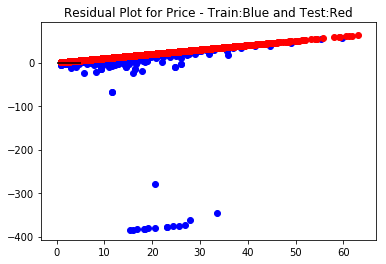

In [20]:
#Residual plot for price
plt.scatter(PricePredict_train,np.subtract(PricePredict_train,y_train.values),c='b')
plt.scatter(PricePredict_test,np.subtract(PricePredict_test,y_test.values),c='r')
#plt.hlines(y=0,xmin=0,xmax=5)

plt.title('Residual Plot for Price - Train:Blue and Test:Red')